# Codecademy portfolio project - Life Expectancy and GDP  
### Data visualization

#### Goals
Identify the relationship between the GDP and life expectancy of six countries.  
Questions:  
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?

#### Data
CSV file all_data.csv from the World Health Organization and the World Bank
- Country - nation
- Year - the year for the observation
- Life expectancy at birth (years) - life expectancy value in years
- GDP - Gross Domestic Product in U.S. dollars  

#### Analysis
##### Import libaries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Global data set exploration:

In [103]:
pd.set_option("display.precision", 2)
data = pd.read_csv('all_data.csv')
data.info()
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
       Country     Year  Life expectancy at birth (years)       GDP
count       96    96.00                             96.00  9.60e+01
unique       6      NaN                               NaN       NaN
top      Chile      NaN                               NaN       NaN
freq        16      NaN                               NaN       NaN
mean       NaN  2007.50                             72.79  3.88e+12
std        NaN     4.63                           

The dataset contains GDP and life expectancy data for 6 different countries, has 96 rows and there seems to be no missing data. 

In [22]:
print(data['Country'].value_counts())
print(data['Year'].value_counts())

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64


The dataset contains data for the years 2000-2015 for the countries:
- Chile
- China
- Germany
- Mexico
- United States of America
- Zimbabwe

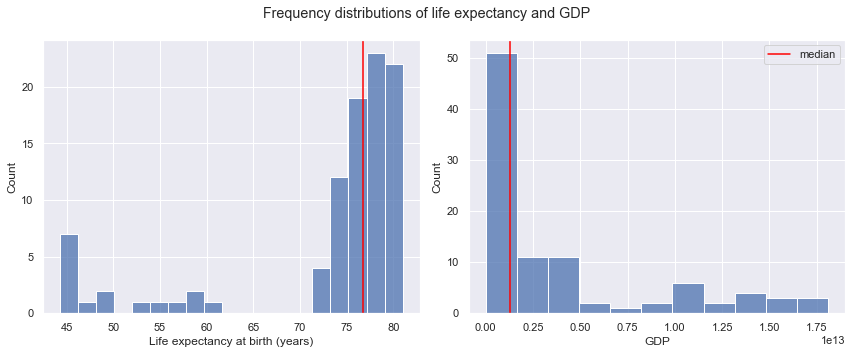

In [109]:
sns.set_theme(style="darkgrid")
f, axes = plt.subplots(1, 2, figsize=(12,5))
f.suptitle('Frequency distributions of life expectancy and GDP')
sns.histplot(data=data, x='Life expectancy at birth (years)', ax=axes[0])
axes[0].axvline(np.median(data['Life expectancy at birth (years)']), color='red')
sns.histplot(data=data, x='GDP', axes=axes[1])
axes[1].axvline(np.median(data['GDP']), color='red')
plt.legend(['median'])
plt.tight_layout()

The median life expectancy is around 76 years for the complete dataset, and the median GDP is around 12.5e11 dollars. The distribution of life expectancy is left skewed, while the GDP distribution is right skewed.

##### Has life expectancy increased over time in the six nations?

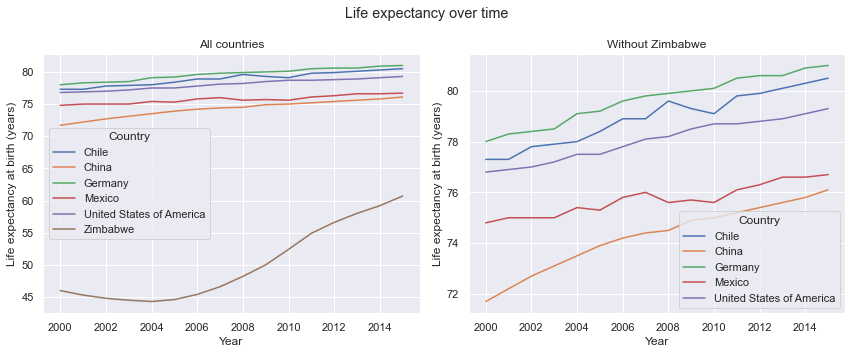

In [64]:
sns.set_theme(style="darkgrid")
f, axes = plt.subplots(1, 2, figsize=(12,5))
f.suptitle('Life expectancy over time')
sns.lineplot(data=data, x='Year', y='Life expectancy at birth (years)', hue='Country', ax=axes[0])
sns.lineplot(data=data[data.Country != 'Zimbabwe'], x='Year', y='Life expectancy at birth (years)', hue='Country', ax=axes[1])
axes[0].title.set_text('All countries')
axes[1].title.set_text('Without Zimbabwe')
plt.tight_layout()

Life expectancy globally increased over time for the six nations. Only Zimbabwe first had a decrease in life expectance from 2000-2004, and in general the life expectancy is significantly lower in Zimbabwe compared to the other 5 countries. 

##### Has GDP increased over time in the six nations?

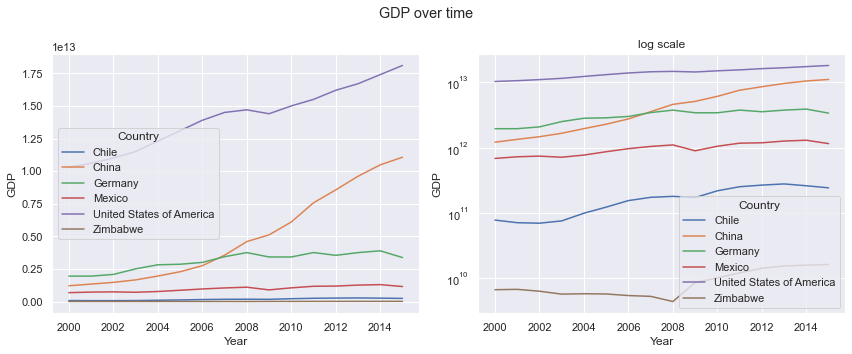

In [71]:
sns.set_theme(style="darkgrid")
f, axes = plt.subplots(1, 2, figsize=(12,5))
f.suptitle('GDP over time')
sns.lineplot(data=data, x='Year', y='GDP', hue='Country', ax=axes[0])
sns.lineplot(data=data, x='Year', y='GDP', hue='Country', ax=axes[1])
axes[1].set(yscale='log')
axes[1].title.set_text('log scale')
plt.tight_layout()

Comparing 2015 with 2000, the GDP is higher for all six nations in 2015 than in 2000. There were some fluctuations over the years.

##### Is there a correlation between GDP and life expectancy of a country?

[[<AxesSubplot:title={'center':'Chile'}>
  <AxesSubplot:title={'center':'China'}>
  <AxesSubplot:title={'center':'Germany'}>]
 [<AxesSubplot:title={'center':'Mexico'}>
  <AxesSubplot:title={'center':'United States of America'}>
  <AxesSubplot:title={'center':'Zimbabwe'}>]]


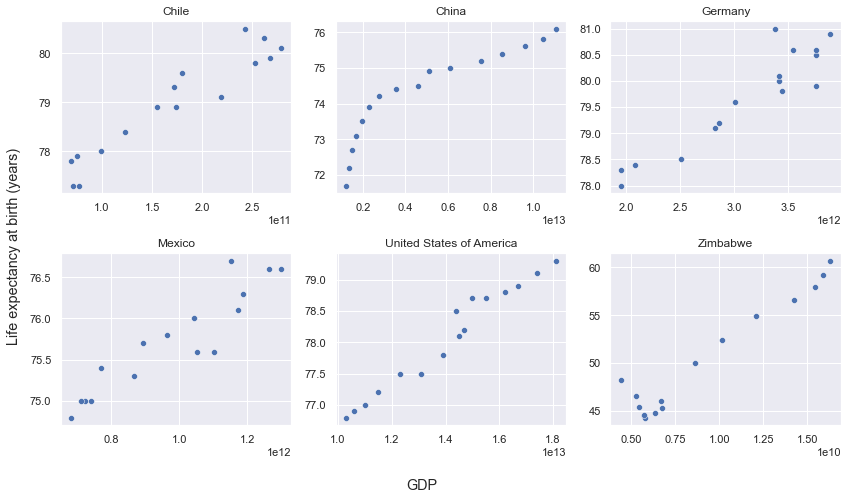

In [105]:
f, axes = plt.subplots(2, 3, figsize=(12,7))
ax1=0
ax2=0
for country in data.Country.unique():
    sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', data=data[data.Country==country], ax=axes[ax1,ax2])
    axes[ax1,ax2].title.set_text(country)
    ax2+=1
    if ax2>2:
        ax1+=1
        ax2=0
plt.setp(axes, xlabel=None, ylabel=None)
f.supxlabel('GDP')
f.supylabel('Life expectancy at birth (years)')
plt.tight_layout()
print(axes)

There is a positive correlation between GDP and life expectancy for all six nations. Especially for China this correlation appears not to be linear but logarithmic.

### Conclusions

Both life expectancy and GDP increased over the years for Chile, China, Germany, Mexico, USA and Zimbabwe. These measures showed a positive correlation for all six nations. 